<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-6622.137829,-6544.699234,599.998452,-7144.697686
1,0.0,1.0,26.388063,-1132.249551,-1095.861488,-67.454216,-1028.407272
2,0.0,2.0,61.016701,-562.488664,-491.471962,495.582997,-987.054959
3,0.0,3.0,21.594724,767.613381,799.208105,-145.390531,944.598636
4,0.0,4.0,36.457840,-494.744613,-448.286774,96.273243,-544.560017
...,...,...,...,...,...,...,...
19995,999.0,15.0,66.549489,-1800.953289,-1724.403799,-113.685145,-1610.718654
19996,999.0,16.0,44.638889,110.401934,165.040823,-195.727641,360.768464
19997,999.0,17.0,60.673243,96.300960,166.974204,-135.688279,302.662483
19998,999.0,18.0,63.320261,-1774.774285,-1701.454024,-125.776732,-1575.677292


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-6622.137829,-6544.699234,599.998452,-7144.697686
1,0.0,1.0,26.388063,-1132.249551,-1095.861488,-67.454216,-1028.407272
2,0.0,2.0,61.016701,-562.488664,-491.471962,495.582997,-987.054959
3,0.0,3.0,21.594724,767.613381,799.208105,-145.390531,944.598636
4,0.0,4.0,36.457840,-494.744613,-448.286774,96.273243,-544.560017
...,...,...,...,...,...,...,...
19995,999.0,15.0,66.549489,-1800.953289,-1724.403799,-113.685145,-1610.718654
19996,999.0,16.0,44.638889,110.401934,165.040823,-195.727641,360.768464
19997,999.0,17.0,60.673243,96.300960,166.974204,-135.688279,302.662483
19998,999.0,18.0,63.320261,-1774.774285,-1701.454024,-125.776732,-1575.677292


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    67.438595 -6622.137829 -6544.699234  599.998452 -7144.697686
      1.0    26.388063 -1132.249551 -1095.861488  -67.454216 -1028.407272
      2.0    61.016701  -562.488664  -491.471962  495.582997  -987.054959
      3.0    21.594724   767.613381   799.208105 -145.390531   944.598636
      4.0    36.457840  -494.744613  -448.286774   96.273243  -544.560017
...                ...          ...          ...         ...          ...
999.0 15.0   66.549489 -1800.953289 -1724.403799 -113.685145 -1610.718654
      16.0   44.638889   110.401934   165.040823 -195.727641   360.768464
      17.0   60.673243    96.300960   166.974204 -135.688279   302.662483
      18.0   63.320261 -1774.774285 -1701.454024 -125.776732 -1575.677292
      19.0   51.793794   135.222678   197.016472 -168.936669   365.953140

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    67.438595 -6622.137829 -6544.699234  599.998452 -7144.697686
      1.0    26.388063 -1132.249551 -1095.861488  -67.454216 -1028.407272
      2.0    61.016701  -562.488664  -491.471962  495.582997  -987.054959
      3.0    21.594724   767.613381   799.208105 -145.390531   944.598636
      4.0    36.457840  -494.744613  -448.286774   96.273243  -544.560017
...                ...          ...          ...         ...          ...
999.0 15.0   66.549489 -1800.953289 -1724.403799 -113.685145 -1610.718654
      16.0   44.638889   110.401934   165.040823 -195.727641   360.768464
      17.0   60.673243    96.300960   166.974204 -135.688279   302.662483
      18.0   63.320261 -1774.774285 -1701.454024 -125.776732 -1575.677292
      19.0   51.793794   135.222678   197.016472 -168.936669   365.953140

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,67.438595,-6622.137829,-6544.699234,599.998452,-7144.697686
1,0.0,1.0,26.388063,-1132.249551,-1095.861488,-67.454216,-1028.407272
2,0.0,2.0,61.016701,-562.488664,-491.471962,495.582997,-987.054959
3,0.0,3.0,21.594724,767.613381,799.208105,-145.390531,944.598636
4,0.0,4.0,36.457840,-494.744613,-448.286774,96.273243,-544.560017
...,...,...,...,...,...,...,...
19995,999.0,15.0,66.549489,-1800.953289,-1724.403799,-113.685145,-1610.718654
19996,999.0,16.0,44.638889,110.401934,165.040823,-195.727641,360.768464
19997,999.0,17.0,60.673243,96.300960,166.974204,-135.688279,302.662483
19998,999.0,18.0,63.320261,-1774.774285,-1701.454024,-125.776732,-1575.677292


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1            e            Y       y_hat        e_hat
rep   index                                                              
0.0   0.0    67.438595 -6622.137829 -6544.699234  599.998452 -7144.697686
      1.0    26.388063 -1132.249551 -1095.861488  -67.454216 -1028.407272
      2.0    61.016701  -562.488664  -491.471962  495.582997  -987.054959
      3.0    21.594724   767.613381   799.208105 -145.390531   944.598636
      4.0    36.457840  -494.744613  -448.286774   96.273243  -544.560017
...                ...          ...          ...         ...          ...
999.0 15.0   66.549489 -1800.953289 -1724.403799 -113.685145 -1610.718654
      16.0   44.638889   110.401934   165.040823 -195.727641   360.768464
      17.0   60.673243    96.300960   166.974204 -135.688279   302.662483
      18.0   63.320261 -1774.774285 -1701.454024 -125.776732 -1575.677292
      19.0   51.793794   135.222678   197.016472 -168.936669   365.953140

[20000 rows x 5 columns]

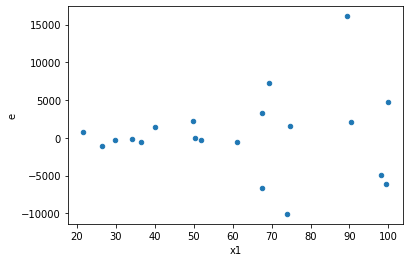

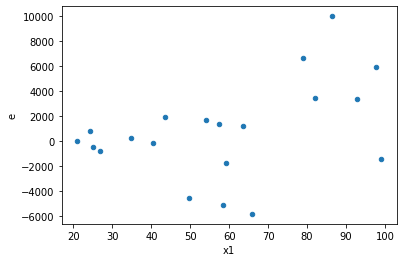

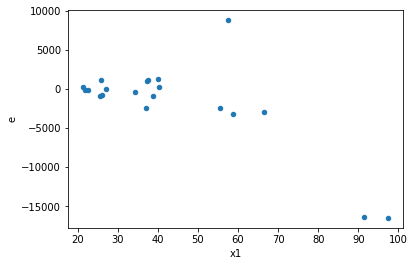

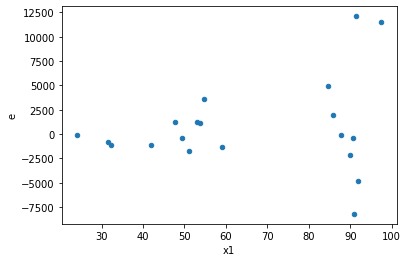

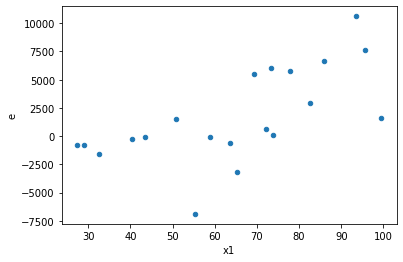

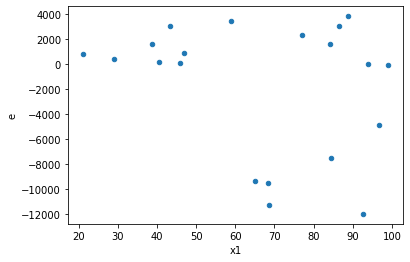

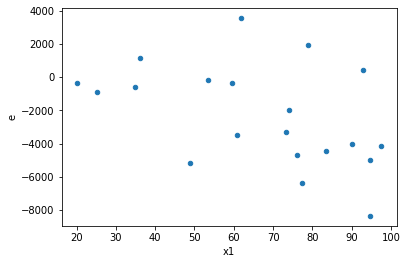

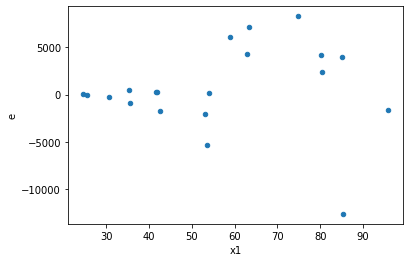

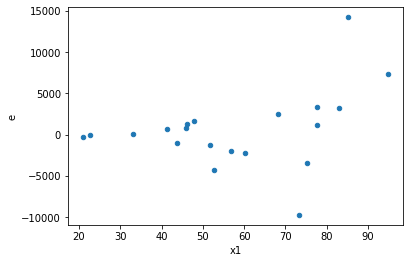

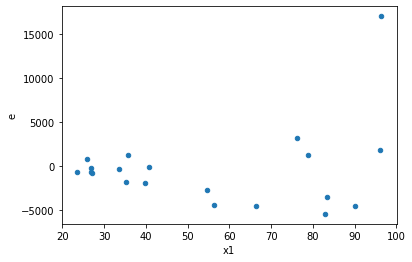

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,7.0,7.0,6750618.238282341,489538332.15770584,964374.0340403344,69934047.45110084,72.51755541167535,1.0647078265257903e-05,0.9999946764608674,5.323539132628952e-06,Reject001=0 : Heteroscedasticity
1.0,7.0,7.0,20852594.39356915,148796037.44261652,2978942.056224164,21256576.777516644,7.1356127028732965,0.01888642538416896,0.9905567873079155,0.00944321269208448,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,7858000.760875235,304779498.92642176,1122571.5372678908,43539928.41806025,38.78588310196027,8.926310466295106e-05,0.9999553684476685,4.463155233147553e-05,Reject001=0 : Heteroscedasticity
4.0,7.0,7.0,42050052.8931841,76175756.8121068,6007150.413312015,10882250.973158116,1.8115496074549324,0.4512825071510649,0.7743587464244676,0.22564125357553244,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,3531877.0375031023,215991045.8508121,504553.8625004432,30855863.69297316,61.15474676986752,1.9068503579466878e-05,0.9999904657482103,9.534251789733439e-06,Reject001=0 : Heteroscedasticity
8.0,7.0,7.0,3618138.983746661,221890386.43481067,516876.9976780944,31698626.63354438,61.327214745365694,1.8886117256089463e-05,0.999990556941372,9.443058628044732e-06,Reject001=0 : Heteroscedasticity
9.0,7.0,7.0,6371817.4861978665,291083792.88496685,910259.6408854095,41583398.983566694,45.68300857886935,5.1387394293778144e-05,0.9999743063028531,2.5693697146889072e-05,Reject001=0 : Heteroscedasticity
10.0,7.0,7.0,5568146.102033231,957661867.2124273,795449.4431476045,136808838.1732039,171.98935689972882,5.409815597712253e-07,0.9999997295092201,2.7049077988561265e-07,Reject001=0 : Heteroscedasticity
11.0,7.0,7.0,16321464.49331612,461680642.3126488,2331637.7847594456,65954377.47323554,28.286716703743945,0.00025621353169680283,0.9998718932341516,0.00012810676584840142,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,6750618.238282341,489538332.15770584,964374.0340403344,69934047.45110084,72.51755541167535,1.0647078265257903e-05,Reject001=0 : Heteroscedasticity
1.0,7.0,7.0,20852594.39356915,148796037.44261652,2978942.056224164,21256576.777516644,7.1356127028732965,0.01888642538416896,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,153041134.0659296,2637019.53150038,21863019.152275655,376717.0759286257,0.017230789275021714,2.2795551690369205e-05,Reject001=0 : Heteroscedasticity
3.0,7.0,7.0,7858000.760875235,304779498.92642176,1122571.5372678908,43539928.41806025,38.78588310196027,8.926310466295106e-05,Reject001=0 : Heteroscedasticity
4.0,7.0,7.0,42050052.8931841,76175756.8121068,6007150.413312015,10882250.973158116,1.8115496074549324,0.4512825071510649,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,213407827.05890104,8491653.490387026,30486832.43698586,1213093.355769575,0.03979073123706616,0.00037870518676083614,Reject001=0 : Heteroscedasticity
6.0,7.0,7.0,76309691.50390315,25137302.014903963,10901384.500557592,3591043.1449862802,0.3294116581983328,0.16611181013374987,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,3531877.0375031023,215991045.8508121,504553.8625004432,30855863.69297316,61.15474676986752,1.9068503579466878e-05,Reject001=0 : Heteroscedasticity
8.0,7.0,7.0,3618138.983746661,221890386.43481067,516876.9976780944,31698626.63354438,61.327214745365694,1.8886117256089463e-05,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    794
Reject001=1 : Homoscedasticity      206
Name: Result_test, dtype: int64